In [1]:
%pylab --no-import-all notebook
import warnings
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import pandas as pd
import Classification as CL
import os
import time
from copy import copy
way = os.getcwd() + "/Data_npy/"
way1 = way + "Chosen ones/"
valid_path = os.getcwd() + "/Validační tabulky/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
trlist = np.load(way + "seznam.npy").tolist()

<IPython.core.display.Javascript object>


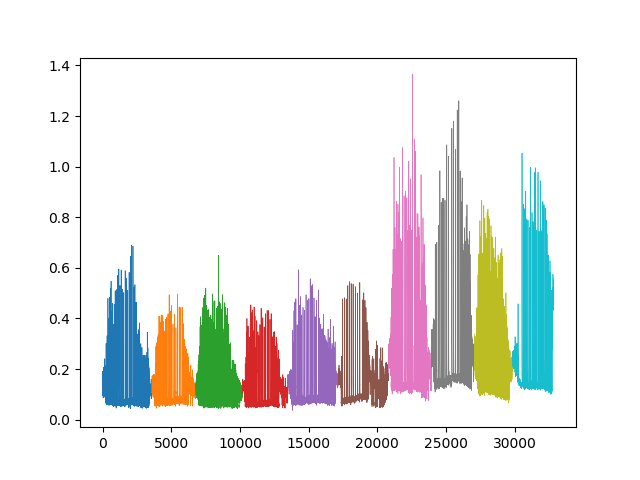

In [3]:
tmp = [np.load(way1 + d)[1] for d in trlist[:-1]]
tmp.append(np.load(way1 + "No11.npy")[1])
plt.figure("Vybraná reálná data")
posun = 0
for i in tmp:
    plt.plot(np.arange(len(i))+ posun, i, '-', lw=0.5)
    posun = posun +len(i) 
plt.show()

<IPython.core.display.Javascript object>


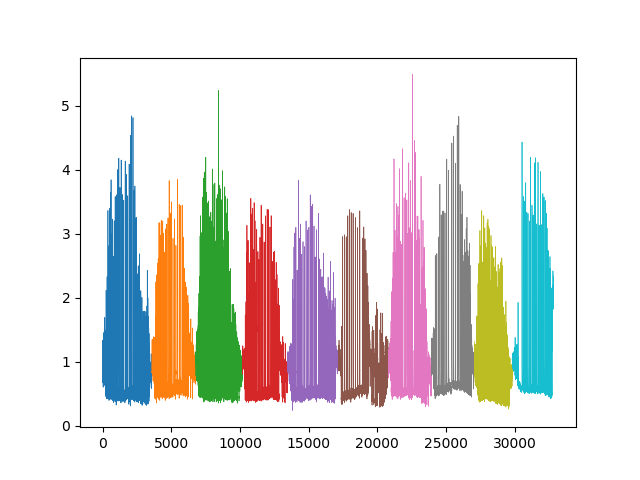

In [4]:
norma = [CL.normalization(np.load(way1 + d)[1] , delka_useku = 20, training_set = True) for d in trlist[:-1]]
norma.append(CL.normalization(np.load(way1 + "No11.npy")[1] , delka_useku = 20, training_set = True))
plt.figure("Vybraná reálná data po normalizaci")
posun = 0
for i in norma:
    plt.plot(np.arange(len(i))+ posun, i, '-', lw=0.5)
    posun = posun +len(i)
plt.show()

In [7]:
train_data = []
test_data = []
for data in trlist[:-1]:
    train_data.append(np.load(way1 + data))

train_data.append(np.load(way1 + "No11.npy"))    
test_data.append(copy(train_data[-1]))

In [8]:
print(len(train_data), len(test_data))

10 1


In [9]:
G_HMM = GaussianHMM(3, covariance_type = "full", algorithm = "viterbi", init_params='t', 
                 params = 'mtc')

In [31]:
tab = CL.validace_new(G_HMM, train_data[:-1], test_data, [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = False)

[########################################################################] 100%


5792.239321708679


In [33]:
tab.to_csv(valid_path + 'Real_data_HMM_1_Hm.csv',index=False)

In [32]:
train_data1 = copy(train_data[:-2])
train_data1.append(copy(train_data[-1]))
len(train_data1)

9

In [37]:
Sorted = tab.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3026,"(1, 0, 1, 1, 1)","(6, 10, 12, 14)",0.913667,259,0.954910,0.874042,0.836957,0.888636,0.953065,0.815951,0.880000,0.956763,0.941038,0.797927
3051,"(1, 0, 1, 1, 1)","(6, 10, 16, 15)",0.910333,269,0.950690,0.875136,0.837908,0.887912,0.966762,0.810865,0.845646,0.935144,0.950472,0.830311
2931,"(1, 0, 1, 1, 1)","(4, 10, 14, 15)",0.910000,270,0.953769,0.859574,0.837022,0.883455,0.964306,0.782946,0.867872,0.943459,0.952830,0.808290
2990,"(1, 0, 1, 1, 1)","(6, 8, 12, 14)",0.909333,272,0.950738,0.874317,0.831099,0.885385,0.954723,0.814664,0.861111,0.946785,0.943396,0.803109
2918,"(1, 0, 1, 1, 1)","(4, 10, 12, 14)",0.909000,273,0.950710,0.874042,0.830214,0.884989,0.955232,0.815951,0.857735,0.946231,0.941038,0.804404
2944,"(1, 0, 1, 1, 1)","(4, 10, 16, 16)",0.908667,274,0.947518,0.881650,0.836551,0.888573,0.970366,0.816901,0.831202,0.925721,0.957547,0.841969
2932,"(1, 0, 1, 1, 1)","(4, 10, 14, 16)",0.908333,275,0.947964,0.878261,0.835492,0.887239,0.967667,0.814516,0.835492,0.929047,0.952830,0.835492
3147,"(1, 0, 1, 1, 1)","(0, 10, 14, 15)",0.908000,276,0.947458,0.877307,0.836970,0.887245,0.971462,0.812877,0.829517,0.924612,0.952830,0.844560
4118,"(1, 1, 1, 1, 1)","(6, 10, 16, 16)",0.908000,276,0.947130,0.881650,0.833982,0.887588,0.966532,0.816901,0.835065,0.928492,0.957547,0.832902
3052,"(1, 0, 1, 1, 1)","(6, 10, 16, 16)",0.907667,277,0.947518,0.877996,0.834939,0.886817,0.970366,0.815789,0.828025,0.925721,0.950472,0.841969


In [38]:
tab1 = CL.validace_new(G_HMM, train_data1, [train_data[-2]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = False)

[########################################################################] 100%


5583.875485897064


In [39]:
tab1.to_csv(valid_path + 'Real_data_HMM_2_Hm.csv',index=False)

In [46]:
Sorted = tab1.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3998,"(1, 1, 1, 1, 1)","(4, 10, 14, 16)",0.815904,507,0.809884,0.820623,0.818813,0.816440,0.795837,0.974490,0.784922,0.824435,0.708720,0.855761
752,"(0, 0, 1, 1, 1)","(4, 8, 12, 16)",0.814815,510,0.820680,0.815054,0.809543,0.815092,0.751066,0.969309,0.826891,0.904517,0.703154,0.792909
3950,"(1, 1, 1, 1, 1)","(4, 8, 12, 16)",0.812999,515,0.804793,0.827068,0.814297,0.815386,0.783285,0.982143,0.786197,0.827515,0.714286,0.844480
4118,"(1, 1, 1, 1, 1)","(6, 10, 16, 16)",0.812999,515,0.813835,0.804798,0.815238,0.811291,0.806452,0.976190,0.773121,0.821355,0.684601,0.862208
2944,"(1, 0, 1, 1, 1)","(4, 10, 16, 16)",0.811547,519,0.815079,0.787813,0.817212,0.806701,0.808898,0.952632,0.774729,0.821355,0.671614,0.864625
3100,"(1, 0, 1, 1, 1)","(0, 8, 12, 16)",0.810821,521,0.828452,0.777202,0.810338,0.805331,0.844350,0.880282,0.766906,0.813142,0.695733,0.858985
968,"(0, 0, 1, 1, 1)","(0, 8, 12, 16)",0.810821,521,0.836311,0.778261,0.801748,0.805440,0.789426,0.939633,0.790752,0.889117,0.664193,0.813054
2884,"(1, 0, 1, 1, 1)","(4, 8, 12, 16)",0.810094,523,0.813098,0.795154,0.813002,0.807085,0.798220,0.978320,0.773654,0.828542,0.669759,0.856567
3076,"(1, 0, 1, 1, 1)","(6, 0, 14, 16)",0.808279,528,0.837109,0.757709,0.809845,0.801554,0.881818,0.721477,0.798122,0.796715,0.797774,0.821918
2932,"(1, 0, 1, 1, 1)","(4, 10, 14, 16)",0.807553,530,0.817489,0.776053,0.810913,0.801485,0.809668,0.964187,0.765379,0.825462,0.649351,0.862208


In [44]:
train_data2 = copy(train_data[:-3]) + copy(train_data[-2:])
len(train_data2)

9

In [47]:
tab2 = CL.validace_new(G_HMM, train_data2, [train_data[-3]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = False)

[########################################################################] 100%


5560.466346025467


In [48]:
tab2.to_csv(valid_path + 'Real_data_HMM_3_Hm.csv',index=False)

In [57]:
Sorted = tab2.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3160,"(1, 0, 1, 1, 1)","(0, 10, 16, 16)",0.922732,241,0.945881,0.920522,0.871046,0.912483,0.956334,0.881818,0.868932,0.935654,0.962779,0.873171
3148,"(1, 0, 1, 1, 1)","(0, 10, 14, 16)",0.920487,248,0.945125,0.914016,0.867278,0.908807,0.954790,0.869955,0.869939,0.935654,0.962779,0.864634
3100,"(1, 0, 1, 1, 1)","(0, 8, 12, 16)",0.920487,248,0.942456,0.927885,0.866055,0.912132,0.947733,0.899767,0.868712,0.937236,0.957816,0.863415
4010,"(1, 1, 1, 1, 1)","(4, 10, 16, 16)",0.919525,251,0.939873,0.937799,0.862112,0.913261,0.939873,0.905312,0.878481,0.939873,0.972705,0.846341
4118,"(1, 1, 1, 1, 1)","(6, 10, 16, 16)",0.918884,253,0.939626,0.936068,0.861386,0.912360,0.939378,0.910798,0.874372,0.939873,0.962779,0.848780
3998,"(1, 1, 1, 1, 1)","(4, 10, 14, 16)",0.917602,257,0.938453,0.938331,0.857676,0.911487,0.935992,0.915094,0.874525,0.940928,0.962779,0.841463
4082,"(1, 1, 1, 1, 1)","(6, 8, 16, 16)",0.917602,257,0.938883,0.935758,0.858380,0.911007,0.937895,0.914692,0.870765,0.939873,0.957816,0.846341
4106,"(1, 1, 1, 1, 1)","(6, 10, 14, 16)",0.916640,260,0.938700,0.933171,0.856258,0.909376,0.936483,0.914286,0.870277,0.940928,0.952854,0.842683
3950,"(1, 1, 1, 1, 1)","(4, 8, 12, 16)",0.914075,268,0.936304,0.935758,0.849812,0.907291,0.930693,0.914692,0.872751,0.941983,0.957816,0.828049
968,"(0, 0, 1, 1, 1)","(0, 8, 12, 16)",0.912793,272,0.940538,0.915777,0.840864,0.899060,0.922414,0.877273,0.908062,0.959388,0.957816,0.782927


In [54]:
train_data3 = copy(train_data[:-4]) + copy(train_data[-3:])
len(train_data3)

9

In [55]:
tab3 = CL.validace_new(G_HMM, train_data3, [train_data[-4]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = False)

[########################################################################] 100%


5809.717768907547


In [56]:
tab3.to_csv(valid_path + 'Real_data_HMM_4_Hm.csv',index=False)

In [58]:
Sorted = tab3.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3100,"(1, 0, 1, 1, 1)","(0, 8, 12, 16)",0.840127,502,0.883037,0.804270,0.801971,0.829760,0.887895,0.959660,0.736626,0.878231,0.692190,0.880039
2908,"(1, 0, 1, 1, 1)","(4, 8, 16, 16)",0.838854,506,0.883531,0.796820,0.800726,0.827026,0.882034,0.941545,0.743676,0.885034,0.690658,0.867257
2944,"(1, 0, 1, 1, 1)","(4, 10, 16, 16)",0.838854,506,0.884655,0.790821,0.802536,0.826004,0.884956,0.933333,0.743913,0.884354,0.686064,0.871190
3136,"(1, 0, 1, 1, 1)","(0, 10, 12, 16)",0.838535,507,0.881565,0.800715,0.801601,0.827961,0.889813,0.961373,0.731925,0.873469,0.686064,0.885939
3016,"(1, 0, 1, 1, 1)","(6, 8, 16, 16)",0.838535,507,0.883753,0.792889,0.801627,0.826089,0.883152,0.944915,0.741639,0.884354,0.683002,0.872173
3040,"(1, 0, 1, 1, 1)","(6, 10, 14, 16)",0.838217,508,0.881218,0.801061,0.799453,0.827244,0.876768,0.947699,0.745115,0.885714,0.693721,0.862340
3052,"(1, 0, 1, 1, 1)","(6, 10, 16, 16)",0.838217,508,0.883673,0.792889,0.800903,0.825822,0.883673,0.944915,0.740401,0.883673,0.683002,0.872173
3159,"(1, 0, 1, 1, 1)","(0, 10, 16, 15)",0.837898,509,0.885773,0.788632,0.800000,0.824802,0.890646,0.938689,0.735367,0.880952,0.679939,0.877089
968,"(0, 0, 1, 1, 1)","(0, 8, 12, 16)",0.837580,510,0.876390,0.822086,0.789044,0.829173,0.843829,0.961066,0.771617,0.911565,0.718224,0.807276
2932,"(1, 0, 1, 1, 1)","(4, 10, 14, 16)",0.837580,510,0.881735,0.798942,0.798178,0.826285,0.878460,0.941788,0.743633,0.885034,0.693721,0.861357


In [59]:
train_data4 = copy(train_data[:-5]) + copy(train_data[-4:])
len(train_data4)

9

In [60]:
tab4 = CL.validace_new(G_HMM, train_data4, [train_data[-5]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = False)

[########################################################################] 100%


5666.8100509643555


In [61]:
tab4.to_csv(valid_path + 'Real_data_HMM_5_Hm.csv',index=False)

In [62]:
Sorted = tab4.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3040,"(1, 0, 1, 1, 1)","(6, 10, 14, 16)",0.877126,448,0.924343,0.860786,0.787584,0.857571,0.952928,0.878525,0.721293,0.897423,0.843750,0.867292
3051,"(1, 0, 1, 1, 1)","(6, 10, 16, 15)",0.876303,451,0.923281,0.856397,0.790062,0.856580,0.951834,0.858639,0.736111,0.896392,0.854167,0.852547
3004,"(1, 0, 1, 1, 1)","(6, 8, 14, 16)",0.876303,451,0.923200,0.860477,0.787105,0.856927,0.952825,0.876757,0.720490,0.895361,0.844792,0.867292
3016,"(1, 0, 1, 1, 1)","(6, 8, 16, 16)",0.876029,452,0.922340,0.861082,0.787363,0.856928,0.952747,0.876890,0.720000,0.893814,0.845833,0.868633
3052,"(1, 0, 1, 1, 1)","(6, 10, 16, 16)",0.876029,452,0.921971,0.860920,0.788578,0.857156,0.953719,0.874329,0.721111,0.892268,0.847917,0.869973
3003,"(1, 0, 1, 1, 1)","(6, 8, 14, 15)",0.875754,453,0.921289,0.864550,0.782178,0.856006,0.944745,0.878495,0.726437,0.898969,0.851042,0.847185
3015,"(1, 0, 1, 1, 1)","(6, 8, 16, 15)",0.875480,454,0.920829,0.861668,0.787026,0.856508,0.950110,0.873662,0.724099,0.893299,0.850000,0.861930
4082,"(1, 1, 1, 1, 1)","(6, 8, 16, 16)",0.875480,454,0.923648,0.859251,0.782502,0.855134,0.950873,0.869797,0.724059,0.897938,0.848958,0.851206
2884,"(1, 0, 1, 1, 1)","(4, 8, 12, 16)",0.874383,458,0.923847,0.859714,0.774876,0.852812,0.945013,0.874058,0.722738,0.903608,0.845833,0.835121
3039,"(1, 0, 1, 1, 1)","(6, 10, 14, 15)",0.874383,458,0.921690,0.857143,0.774236,0.851023,0.921215,0.864407,0.767105,0.922165,0.850000,0.781501


In [64]:
train_data5 = copy(train_data[:-6]) + copy(train_data[-5:])
len(train_data5)

9

In [65]:
tab5 = CL.validace_new(G_HMM, train_data5, [train_data[-6]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = False)

[########################################################################] 100%


5479.520788908005


In [74]:
tab5.to_csv(valid_path + 'Real_data_HMM_6_Hm.csv',index=False)

In [67]:
Sorted = tab5.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3136,"(1, 0, 1, 1, 1)","(0, 10, 12, 16)",0.923098,282,0.940954,0.950893,0.877495,0.923114,0.947218,0.974828,0.858030,0.934772,0.928105,0.897864
2070,"(0, 1, 1, 1, 1)","(0, 10, 12, 16)",0.922007,286,0.938814,0.965286,0.872283,0.925461,0.945290,0.993088,0.851459,0.932426,0.938998,0.894150
3135,"(1, 0, 1, 1, 1)","(0, 10, 12, 15)",0.920916,290,0.939216,0.953125,0.871842,0.921394,0.939437,0.977117,0.862727,0.938996,0.930283,0.881151
3016,"(1, 0, 1, 1, 1)","(6, 8, 16, 16)",0.920644,291,0.940404,0.935205,0.875116,0.916908,0.940404,0.927195,0.878391,0.940404,0.943355,0.871866
2069,"(0, 1, 1, 1, 1)","(0, 10, 12, 15)",0.920644,291,0.937734,0.967598,0.867559,0.924297,0.935544,0.993119,0.862385,0.939934,0.943355,0.872795
3052,"(1, 0, 1, 1, 1)","(6, 10, 16, 16)",0.920371,292,0.940568,0.929990,0.875472,0.915343,0.941675,0.893574,0.889741,0.939465,0.969499,0.861653
4202,"(1, 1, 1, 1, 1)","(0, 10, 12, 16)",0.919553,295,0.939102,0.937365,0.873318,0.916595,0.941093,0.929336,0.872913,0.937119,0.945534,0.873723
3040,"(1, 0, 1, 1, 1)","(6, 10, 14, 16)",0.919280,296,0.939387,0.937229,0.871315,0.915977,0.936975,0.931183,0.878302,0.941811,0.943355,0.864438
3028,"(1, 0, 1, 1, 1)","(6, 10, 12, 16)",0.919280,296,0.938127,0.951002,0.868556,0.919228,0.933550,0.972665,0.868959,0.942750,0.930283,0.868152
3004,"(1, 0, 1, 1, 1)","(6, 8, 14, 16)",0.919007,297,0.939167,0.938245,0.870379,0.915930,0.936538,0.933190,0.877358,0.941811,0.943355,0.863510


In [68]:
train_data6 = copy(train_data[:-7]) + copy(train_data[-6:])
len(train_data6)

9

In [69]:
tab6 = CL.validace_new(G_HMM, train_data6, [train_data[-7]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = False)

[########################################################################] 100%


5516.956809997559


In [75]:
tab6.to_csv(valid_path + 'Real_data_HMM_7_Hm.csv',index=False)

In [71]:
Sorted = tab6.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3040,"(1, 0, 1, 1, 1)","(6, 10, 14, 16)",0.858391,470,0.874884,0.843251,0.842570,0.853568,0.928807,0.802486,0.796846,0.826878,0.888379,0.893861
3004,"(1, 0, 1, 1, 1)","(6, 8, 14, 16)",0.857788,472,0.874341,0.840959,0.842983,0.852761,0.927584,0.800830,0.797586,0.826878,0.885321,0.893861
2884,"(1, 0, 1, 1, 1)","(4, 8, 12, 16)",0.856282,477,0.872301,0.835479,0.844845,0.850875,0.919376,0.784946,0.813886,0.829812,0.892966,0.878252
3052,"(1, 0, 1, 1, 1)","(6, 10, 16, 16)",0.855981,478,0.871938,0.826494,0.850791,0.849741,0.924392,0.780952,0.809972,0.825117,0.877676,0.895942
3016,"(1, 0, 1, 1, 1)","(6, 8, 16, 16)",0.855981,478,0.872795,0.841716,0.838929,0.851147,0.923379,0.815186,0.787934,0.827465,0.870031,0.896982
4058,"(1, 1, 1, 1, 1)","(6, 8, 12, 16)",0.855077,481,0.872157,0.835607,0.840784,0.849516,0.915484,0.787551,0.812621,0.832746,0.889908,0.870968
3039,"(1, 0, 1, 1, 1)","(6, 10, 14, 15)",0.855077,481,0.873118,0.842867,0.834166,0.850051,0.916183,0.800550,0.802113,0.833920,0.889908,0.868887
3051,"(1, 0, 1, 1, 1)","(6, 10, 16, 15)",0.855077,481,0.870719,0.826992,0.849301,0.849004,0.918022,0.779432,0.815916,0.828052,0.880734,0.885536
3028,"(1, 0, 1, 1, 1)","(6, 10, 12, 16)",0.855077,481,0.874961,0.845300,0.830078,0.850113,0.923127,0.819225,0.781969,0.831573,0.873089,0.884495
3003,"(1, 0, 1, 1, 1)","(6, 8, 14, 15)",0.855077,481,0.872314,0.842029,0.836000,0.850114,0.914414,0.800275,0.804620,0.833920,0.888379,0.869927


In [72]:
train_data7 = copy(train_data[:-8]) + copy(train_data[-7:])
len(train_data7)

9

In [73]:
tab7 = CL.validace_new(G_HMM, train_data7, [train_data[-8]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = False)

[########################################################################] 100%


5438.051326036453


In [76]:
tab7.to_csv(valid_path + 'Real_data_HMM_8_Hm.csv',index=False)

In [77]:
Sorted = tab7.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
3950,"(1, 1, 1, 1, 1)","(4, 8, 12, 16)",0.830528,574,0.868020,0.814872,0.800000,0.827631,0.922188,0.917976,0.718997,0.819863,0.732591,0.901572
3985,"(1, 1, 1, 1, 1)","(4, 10, 12, 15)",0.829348,578,0.866403,0.818466,0.796616,0.827162,0.913440,0.933929,0.717219,0.823973,0.728412,0.895782
2944,"(1, 0, 1, 1, 1)","(4, 10, 16, 16)",0.829052,579,0.866200,0.805317,0.803738,0.825085,0.937749,0.918004,0.710744,0.804795,0.717270,0.924731
4106,"(1, 1, 1, 1, 1)","(6, 10, 14, 16)",0.828462,581,0.869056,0.805031,0.799133,0.824407,0.932496,0.924188,0.709429,0.813699,0.713092,0.914806
4070,"(1, 1, 1, 1, 1)","(6, 8, 14, 16)",0.827576,584,0.868768,0.801879,0.798844,0.823164,0.934543,0.915921,0.708974,0.811644,0.713092,0.914806
4057,"(1, 1, 1, 1, 1)","(6, 8, 12, 15)",0.827576,584,0.867365,0.807368,0.796598,0.823777,0.918133,0.899145,0.720401,0.821918,0.732591,0.890819
3051,"(1, 0, 1, 1, 1)","(6, 10, 16, 15)",0.826986,586,0.870296,0.795238,0.798704,0.821413,0.932655,0.924354,0.707270,0.815753,0.697772,0.917287
2884,"(1, 0, 1, 1, 1)","(4, 8, 12, 16)",0.826986,586,0.867373,0.800000,0.799422,0.822265,0.929522,0.920290,0.709884,0.813014,0.707521,0.914806
920,"(0, 0, 1, 1, 1)","(6, 10, 16, 16)",0.826690,587,0.867244,0.821151,0.784479,0.824292,0.877895,0.929577,0.732425,0.856849,0.735376,0.844500
4118,"(1, 1, 1, 1, 1)","(6, 10, 16, 16)",0.826690,587,0.866789,0.805359,0.797122,0.823090,0.933597,0.927405,0.705283,0.808904,0.711699,0.916460


In [78]:
train_data8 = copy(train_data[:-9]) + copy(train_data[-8:])
len(train_data8)

9

In [80]:
tab8 = CL.validace_new(G_HMM, train_data8, [train_data[-9]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = False)

[########################################################################] 100%


5635.603549957275


In [81]:
tab8.to_csv(valid_path + 'Real_data_HMM_9_Hm.csv',index=False)

In [82]:
Sorted = tab8.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
4106,"(1, 1, 1, 1, 1)","(6, 10, 14, 16)",0.901192,315,0.917134,0.922481,0.859275,0.899630,0.945408,0.896084,0.833506,0.890502,0.950479,0.886689
1818,"(0, 1, 1, 1, 1)","(4, 8, 12, 16)",0.900565,317,0.918318,0.925138,0.849747,0.897734,0.911747,0.912908,0.869816,0.924985,0.937700,0.830583
752,"(0, 0, 1, 1, 1)","(4, 8, 12, 16)",0.900565,317,0.918692,0.925138,0.848929,0.897586,0.911310,0.912908,0.870520,0.926195,0.937700,0.828383
860,"(0, 0, 1, 1, 1)","(6, 8, 12, 16)",0.900251,318,0.919796,0.927885,0.844914,0.897531,0.913484,0.930868,0.853933,0.926195,0.924920,0.836084
2932,"(1, 0, 1, 1, 1)","(4, 10, 14, 16)",0.899937,319,0.914734,0.928344,0.856995,0.900024,0.949252,0.925397,0.809990,0.882638,0.931310,0.909791
4058,"(1, 1, 1, 1, 1)","(6, 8, 12, 16)",0.899937,319,0.915506,0.931007,0.852442,0.899652,0.937262,0.924409,0.823590,0.894737,0.937700,0.883388
3986,"(1, 1, 1, 1, 1)","(4, 10, 12, 16)",0.899937,319,0.915118,0.931746,0.852754,0.899873,0.937778,0.925868,0.822268,0.893527,0.937700,0.885589
3028,"(1, 0, 1, 1, 1)","(6, 10, 12, 16)",0.899624,320,0.917420,0.925926,0.852987,0.898778,0.946015,0.933442,0.808071,0.890502,0.918530,0.903190
788,"(0, 0, 1, 1, 1)","(4, 10, 12, 16)",0.899624,320,0.919098,0.926282,0.845258,0.896879,0.913876,0.929260,0.852349,0.924380,0.923323,0.838284
2992,"(1, 0, 1, 1, 1)","(6, 8, 12, 16)",0.899624,320,0.917808,0.925181,0.852681,0.898557,0.945478,0.931929,0.809289,0.891712,0.918530,0.900990


In [83]:
train_data9 = copy(train_data[:-10]) + copy(train_data[-9:])
len(train_data9)

9

In [84]:
tab9 = CL.validace_new(G_HMM, train_data9, [train_data[-10]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = False)

[########################################################################] 100%


5766.684189081192


In [85]:
tab9.to_csv(valid_path + 'Real_data_HMM_10_Hm.csv',index=False)

In [86]:
Sorted = tab9.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2422,"(1, 0, 0, 1, 1)","(0, 8, 16, 16)",0.840656,573,0.867079,0.769524,0.835213,0.823939,0.979361,0.652666,0.778305,0.777895,0.937355,0.901099
3171,"(1, 0, 1, 1, 1)","(0, 0, 12, 15)",0.840100,575,0.870225,0.767486,0.830314,0.822675,0.970091,0.647528,0.784766,0.789001,0.941995,0.881476
3170,"(1, 0, 1, 1, 1)","(0, 0, 12, 14)",0.839822,576,0.874784,0.757263,0.827379,0.819809,0.962540,0.635220,0.794224,0.801692,0.937355,0.863422
2386,"(1, 0, 0, 1, 1)","(6, 0, 16, 16)",0.839822,576,0.865487,0.765316,0.836921,0.822574,0.978652,0.644444,0.781868,0.775780,0.941995,0.900314
3172,"(1, 0, 1, 1, 1)","(0, 0, 12, 16)",0.839544,577,0.866156,0.766444,0.834606,0.822402,0.978681,0.650485,0.777251,0.776838,0.932715,0.901099
3184,"(1, 0, 1, 1, 1)","(0, 0, 14, 16)",0.839544,577,0.866077,0.766160,0.834909,0.822382,0.979320,0.648953,0.777778,0.776309,0.935035,0.901099
2494,"(1, 0, 0, 1, 1)","(0, 0, 16, 16)",0.839266,578,0.864577,0.769527,0.834475,0.822860,0.980550,0.658416,0.771848,0.773136,0.925754,0.908163
3183,"(1, 0, 1, 1, 1)","(0, 0, 14, 15)",0.838988,579,0.870911,0.759661,0.829701,0.820091,0.972603,0.639683,0.783671,0.788472,0.935035,0.881476
2458,"(1, 0, 0, 1, 1)","(0, 10, 16, 16)",0.838710,580,0.866824,0.762089,0.832851,0.820588,0.978709,0.653400,0.772483,0.777895,0.914153,0.903454
2421,"(1, 0, 0, 1, 1)","(0, 8, 16, 15)",0.838710,580,0.869743,0.760377,0.830133,0.820084,0.971298,0.640700,0.783821,0.787414,0.935035,0.882261


# Predict proba

In [10]:
test = CL.validuj(G_HMM, train_data[:-1], [train_data[-1]],\
                      delka_okna =[6, 10, 14, 16], parametry  = [1,1,1,1,1], unsupervised = False)

In [11]:
test[-1]

array([[0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       ...,
       [2.73772220e-195, 1.00000000e+000, 4.97615376e-156],
       [1.07928412e-200, 1.00000000e+000, 3.59590654e-161],
       [1.12770184e-215, 1.00000000e+000, 1.00105267e-163]])

<IPython.core.display.Javascript object>


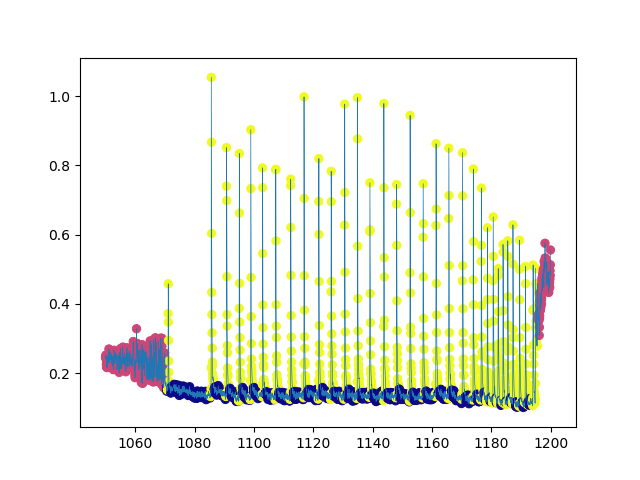

In [21]:
plt.figure("predikovaná data")
plt.plot(train_data[-1][0],train_data[-1][1], lw=0.5)
plt.scatter(train_data[-1][0],train_data[-1][1], c = test[1], cmap= plt.cm.plasma, lw= 0.7)
plt.show()

<IPython.core.display.Javascript object>


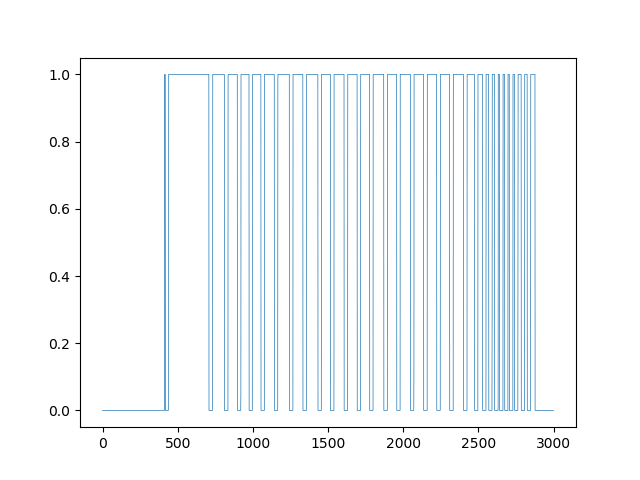

In [14]:
plt.figure("predict probability stavu 0")
plt.plot(test[-1][:,0], '-', lw = 0.5)
plt.show()

<IPython.core.display.Javascript object>


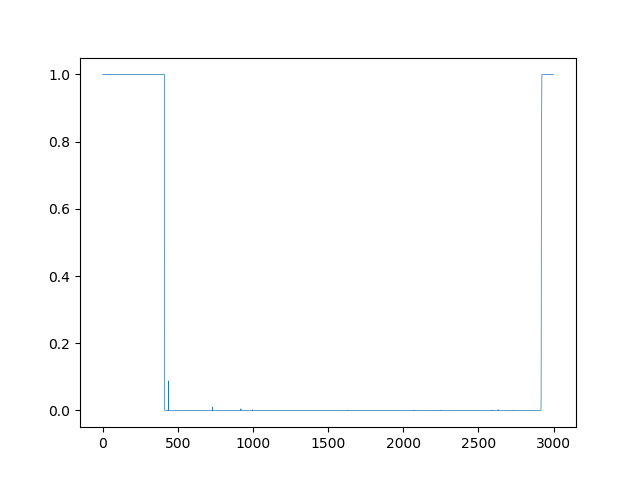

In [15]:
plt.figure("predict probability stavu 1")
plt.plot(test[-1][:,1], '-', lw = 0.5)
plt.show()

<IPython.core.display.Javascript object>


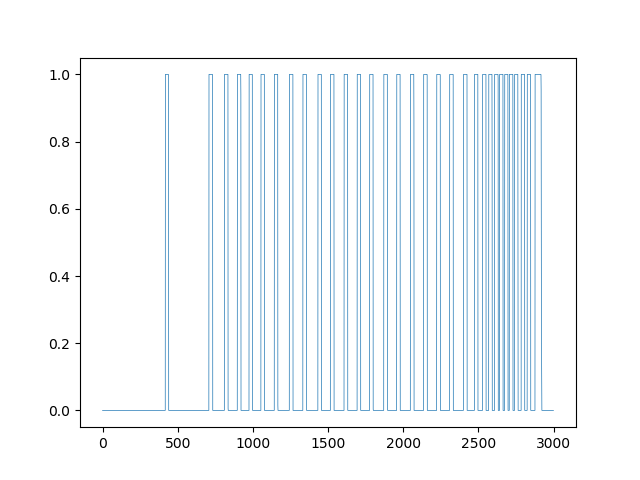

In [16]:
plt.figure("predict probability stavu 2")
plt.plot(test[-1][:,2], '-', lw = 0.5)
plt.show()

# gaussovky

In [28]:
t = CL.make_matrix(train_data[-1],[[6], [10], [14] ,[16]])

In [29]:
np.shape(t)

(3000, 10)

In [30]:
t

array([[ 1.03545115e+00, -5.50654728e-04, -6.83670027e-04, ...,
         1.03545115e+00,  1.03545115e+00,  0.00000000e+00],
       [ 1.03148644e+00, -3.85458310e-05,  8.93920014e-05, ...,
         9.81696237e-01,  9.81696237e-01,  3.92973936e-06],
       [ 1.05791786e+00, -6.06270856e-03, -5.34278114e-03, ...,
         9.41657030e-01,  9.41657030e-01,  1.35454720e-04],
       ...,
       [ 2.02497770e+00,  6.20422683e-02,  4.46459412e-03, ...,
         1.28620510e+00,  1.07572540e+00,  6.35236185e-03],
       [ 2.15449169e+00,  6.14365481e-02, -9.37471797e-03, ...,
         1.30677022e+00,  1.09195758e+00,  9.14078824e-03],
       [ 2.33422539e+00,  4.93056244e-02, -1.31313274e-02, ...,
         1.34294116e+00,  1.11968540e+00,  1.72127901e-02]])

In [79]:
x = []
y = []
z = []
xx = []
yy = []
zz = []
xxx = []
yyy = []
zzz = []
for i, j in enumerate(t):
    if test[1][i]==0:
            x.append(j[1])
            y.append(j[2])
            z.append(j[3])
    if test[1][i]==1:
            xx.append(j[1])
            yy.append(j[2])
            zz.append(j[3])
    if test[1][i]==2:
            xxx.append(j[1])
            yyy.append(j[2])
            zzz.append(j[3])
print(len(x), len(y), len(z))

1739 1739 1739


<IPython.core.display.Javascript object>


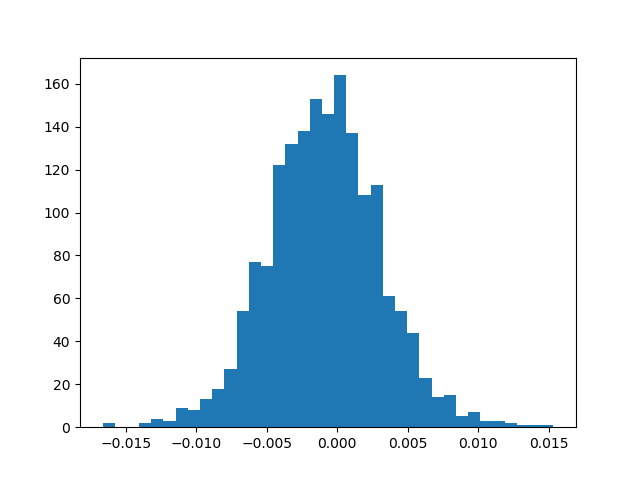

In [80]:
plt.figure("gaussovka stavu 0 rys 1")
plt.hist(x, bins ='auto')
plt.show()

<IPython.core.display.Javascript object>


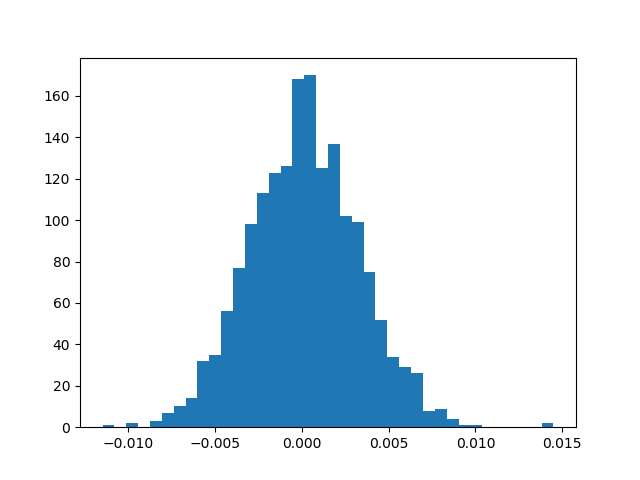

In [36]:
plt.figure("gaussovka stavu 0 rys 2")
plt.hist(y, bins ='auto')
plt.show()

<IPython.core.display.Javascript object>


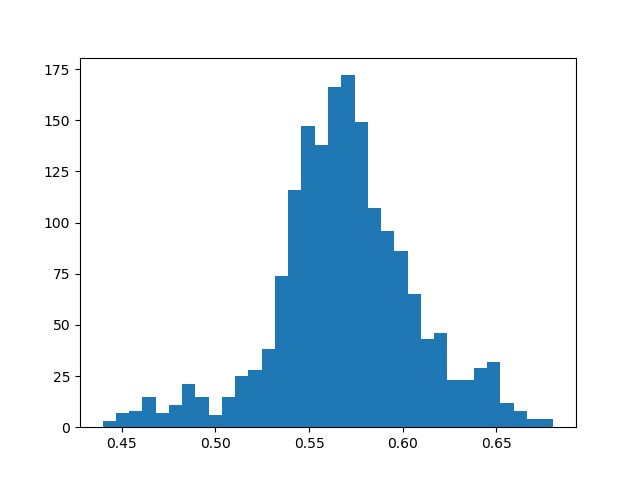

In [81]:
plt.figure("gaussovka stavu 0 rys 3")
plt.hist(z, bins ='auto')
plt.show()

<IPython.core.display.Javascript object>


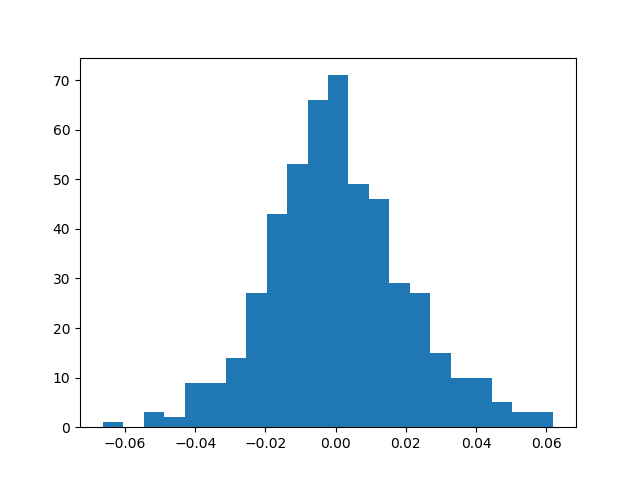

In [82]:
plt.figure("gaussovka stavu 1 rys 1")
plt.hist(xx, bins ='auto')
plt.show()

<IPython.core.display.Javascript object>


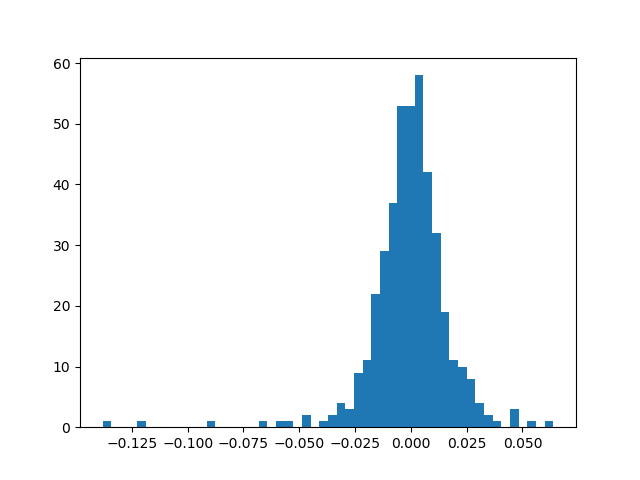

In [63]:
plt.figure("gaussovka stavu 1 rys 2")
plt.hist(yy, bins ='auto')
plt.show()

<IPython.core.display.Javascript object>


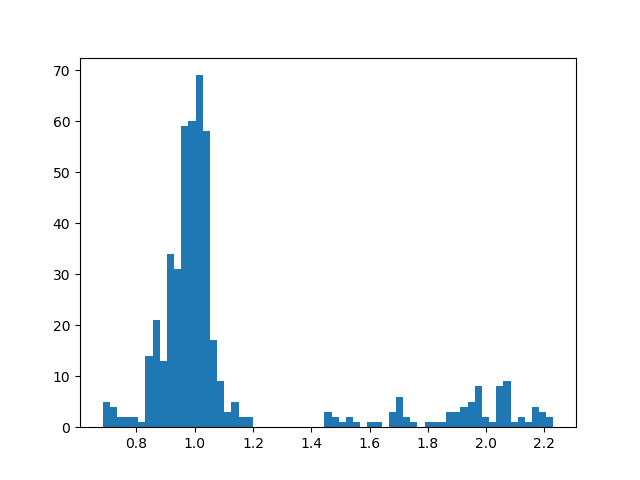

In [83]:
plt.figure("gaussovka stavu 1 rys 3")
plt.hist(zz, bins ='auto')
plt.show()

<IPython.core.display.Javascript object>


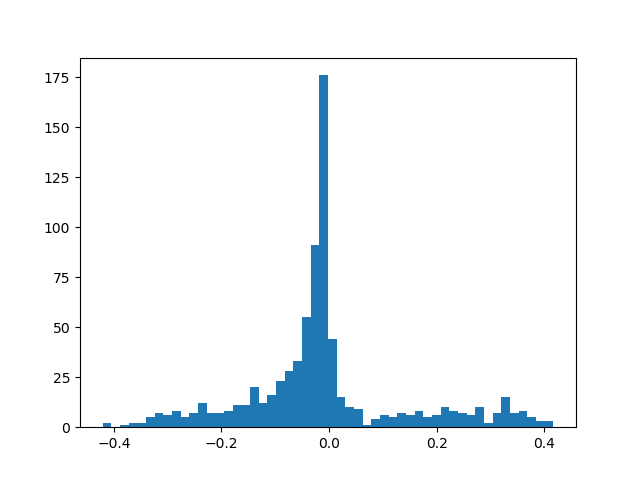

In [64]:
plt.figure("gaussovka stavu 2 rys 1")
plt.hist(xxx, bins ='auto')
plt.show()

<IPython.core.display.Javascript object>


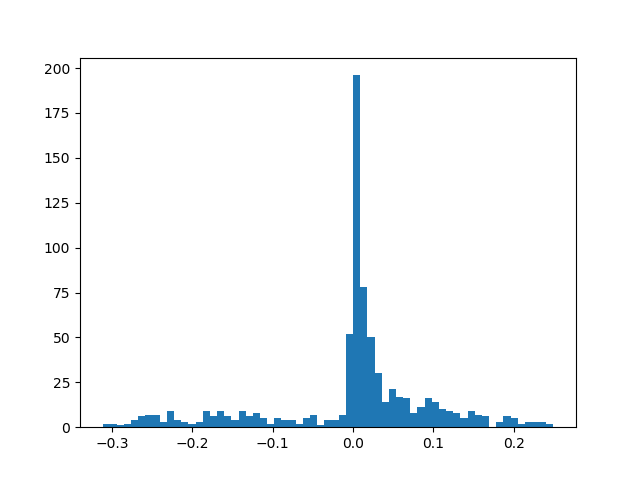

In [45]:
plt.figure("gaussovka stavu 2 rys 2")
plt.hist(yyy, bins ='auto')
plt.show()

<IPython.core.display.Javascript object>


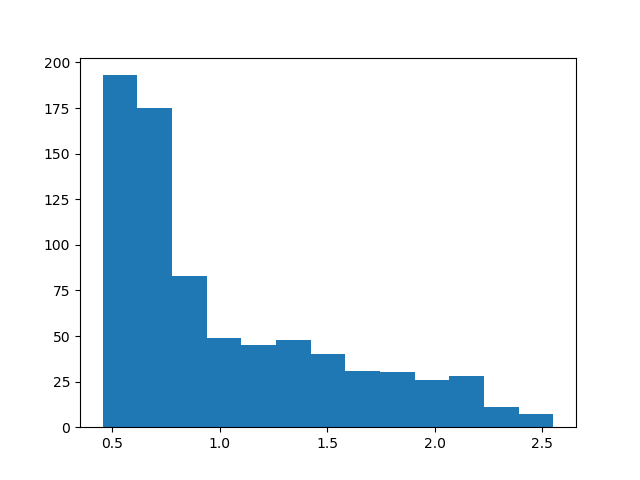

In [46]:
plt.figure("gaussovka stavu 2 rys 3")
plt.hist(zzz, bins ='auto')
plt.show()

<IPython.core.display.Javascript object>


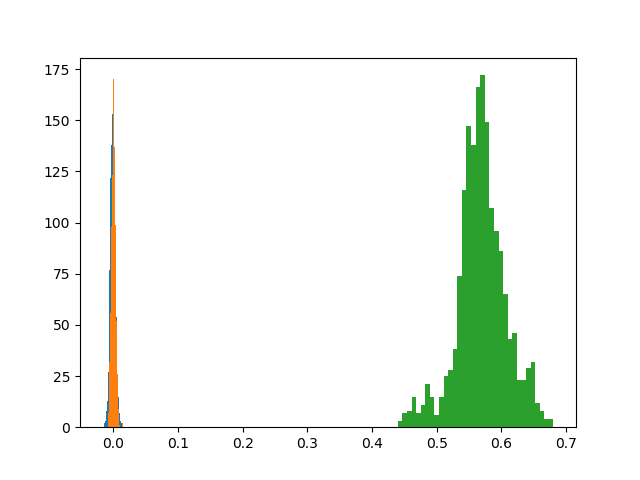

In [51]:
plt.figure("gaussovka stavu 0 3 rysy")
plt.hist(x, bins ='auto')
plt.hist(y, bins ='auto')
plt.hist(z, bins ='auto')
plt.show()

<IPython.core.display.Javascript object>


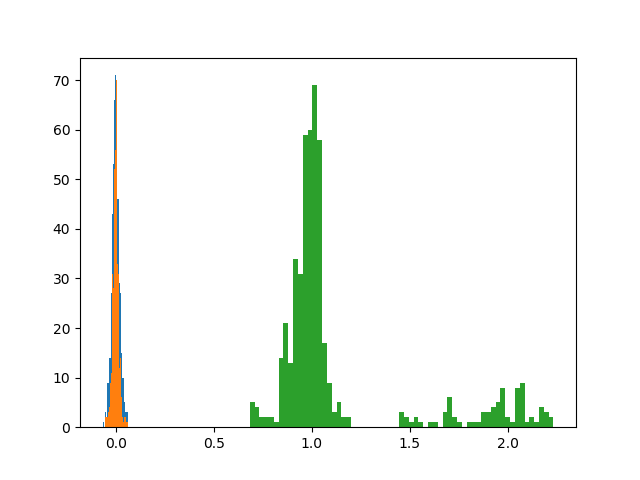

In [52]:
plt.figure("gaussovka stavu 1 3 rysy")
plt.hist(xx, bins ='auto')
plt.hist(yy, bins ='auto')
plt.hist(zz, bins ='auto')
plt.show()

<IPython.core.display.Javascript object>


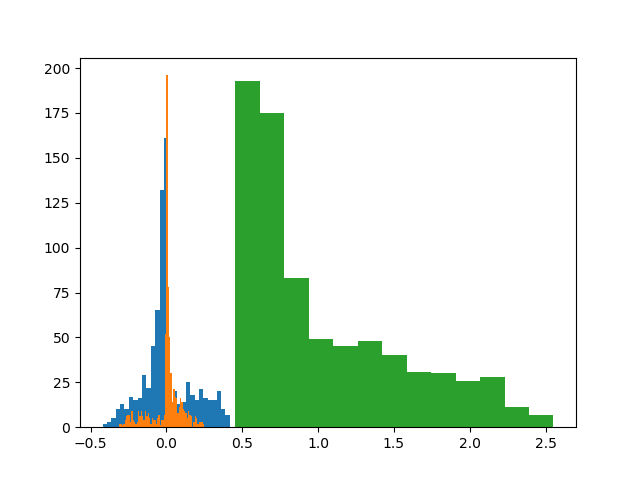

In [53]:
plt.figure("gaussovka stavu 2 3 rysy")
plt.hist(xxx, bins ='auto')
plt.hist(yyy, bins ='auto')
plt.hist(zzz, bins ='auto')
plt.show()

In [55]:
test[-2].means_

array([[0.50547091, 0.50239153, 0.50261216, 0.39702617, 0.50883271,
        0.3329715 , 0.51284385, 0.28398283, 0.52056004, 0.00371149],
       [0.93331355, 0.9179239 , 0.92119899, 0.73618838, 0.94232499,
        0.61887558, 0.94857013, 0.52775926, 0.95407928, 0.01453141],
       [0.92712674, 0.93847719, 0.93667787, 0.71792406, 0.91821071,
        0.59476926, 0.90960785, 0.49884908, 0.89615348, 0.36300536]])

In [56]:
test[-2].covars_

array([[[ 4.33312242e-03,  2.97859907e-03,  3.27115755e-03,
          2.71060185e-03,  3.40937306e-03,  2.20979525e-03,
          3.32186336e-03,  1.84590314e-03,  3.26424992e-03,
          1.56443535e-06],
        [ 2.97859907e-03,  4.32977039e-03,  3.59861218e-03,
          2.43570044e-03,  3.12396544e-03,  2.01597793e-03,
          3.08760815e-03,  1.69493636e-03,  3.05287692e-03,
         -1.05474095e-05],
        [ 3.27115755e-03,  3.59861218e-03,  3.68792052e-03,
          2.45880021e-03,  3.14685938e-03,  2.04230716e-03,
          3.12713840e-03,  1.71806634e-03,  3.09683328e-03,
         -8.29390579e-06],
        [ 2.71060185e-03,  2.43570044e-03,  2.45880021e-03,
          2.10401531e-03,  2.68898317e-03,  1.72422445e-03,
          2.62406237e-03,  1.45200711e-03,  2.60973721e-03,
          1.71615621e-05],
        [ 3.40937306e-03,  3.12396544e-03,  3.14685938e-03,
          2.68898317e-03,  3.44436048e-03,  2.20631767e-03,
          3.36420025e-03,  1.86039893e-03,  3.352446

In [71]:
k = CL.Preprocessing(t, 3, 10, test[1])
k

[array([[ 5.65989149e-01, -8.85214682e-04,  1.85492875e-04,
          5.68952710e-01,  5.72356782e-01,  5.78388515e-01,
          4.44016443e-01,  3.71890331e-01,  3.16397673e-01,
          2.40346087e-03],
        [ 1.12889092e+00,  6.16377317e-04,  1.60753907e-04,
          1.12807768e+00,  1.12825316e+00,  1.12752867e+00,
          8.82288356e-01,  7.38157607e-01,  6.26976863e-01,
          1.14288971e-02],
        [ 1.03223909e+00,  3.20196379e-03, -4.60919163e-04,
          1.02234370e+00,  1.01198390e+00,  9.96279236e-01,
          7.99373189e-01,  6.61891203e-01,  5.54914133e-01,
          4.90906627e-01]]),
 array([[[1.84420006e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.59975682e-05, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00, 0.00000000e+

In [66]:
from math import pi

In [68]:
def gaus(x,mi,sigma):
    return 1/(np.sqrt(2*pi*sigma))*np.exp(-((x-mi)**2)/2/sigma)

In [91]:
x = np.linspace(0,2,1000)

In [92]:
k[0][1][3]

1.1280776843667115

In [93]:
k[1][1][3,3]

0.13339906948574384

<IPython.core.display.Javascript object>


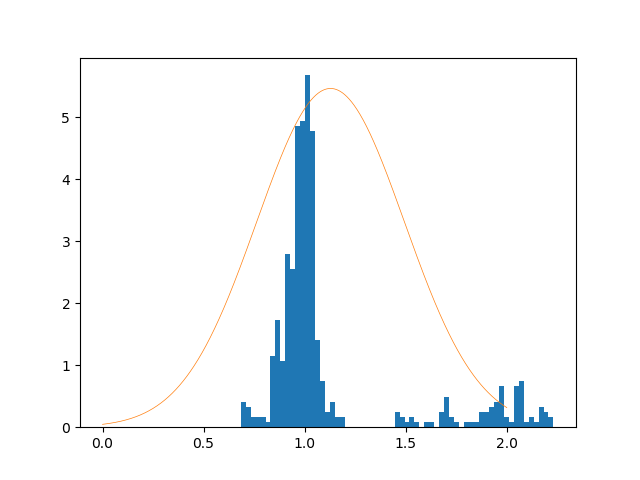

In [97]:
plt.figure("jjj")
plt.hist(zz, bins ='auto', normed=True)
plt.plot(x,5*gaus(x,k[0][1][3],k[1][1][3,3]),lw=0.5)
plt.show()